# Growth rate prediction scatterplots

### Import dependencies

In [20]:
import pandas as pd
import numpy as np
import sys
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score

output_dir = '../plots/'

### Load growth rate data

In [2]:
pfba_growth_parameters = pd.read_csv('../data/growth_parameters/fba_pfba_growth_parameters.csv', index_col=0)
eflux2_growth_parameters = pd.read_csv('../data/growth_parameters/eflux2_growth_parameters.csv', index_col=0)
spot_growth_parameters = pd.read_csv('../data/growth_parameters/spot_growth_parameters.csv', index_col=0)

# put the data in a list
growth_rate_dfs = [
    pfba_growth_parameters,
    eflux2_growth_parameters,
    spot_growth_parameters
]

### Inspect data

In [33]:
display(pfba_growth_parameters)
display(eflux2_growth_parameters)
display(spot_growth_parameters)

,growth rate,yield coefficient,substrate consumption rate,growth rate std dev,yield coefficient std dev,substrate consumption rate std dev,FBA growth rate,pFBA growth rate,FBA yield coefficient,pFBA yield coefficient
WT-P,0.065488,0.048868,1.352072,0.001345,0.004836,0.122279,0.152788,0.152788,0.113003,0.113003
PVHG-P,0.080331,0.040848,1.967485,0.002672,0.001757,0.021785,0.222332,0.222332,0.113003,0.113003
WT-G,0.260195,0.072789,3.582471,0.004749,0.004117,0.141675,0.484379,0.484379,0.135208,0.135208


,growth rate,yield coefficient,substrate consumption rate,growth rate std dev,yield coefficient std dev,substrate consumption rate std dev,E-Flux2 growth rate,E-Flux2 growth std
WT-P,0.065488,0.048868,1.352072,0.001345,0.004836,0.122279,0.090150,0.035612
PVHG-P,0.080331,0.040848,1.967485,0.002672,0.001757,0.021785,0.137203,0.007549
WT-G,0.260195,0.072789,3.582471,0.004749,0.004117,0.141675,0.453455,0.000631


,growth rate,yield coefficient,substrate consumption rate,growth rate std dev,yield coefficient std dev,substrate consumption rate std dev,SPOT growth rate,SPOT growth std
WT-P,0.065488,0.048868,1.352072,0.001345,0.004836,0.122279,0.0,0.0
PVHG-P,0.080331,0.040848,1.967485,0.002672,0.001757,0.021785,0.0,0.0
WT-G,0.260195,0.072789,3.582471,0.004749,0.004117,0.141675,0.0,0.0


### Plot the three scatterplots at once

ssr: 0.02601462577375131
ssr: 0.013730709808792568
ssr: 0.026147712966492417


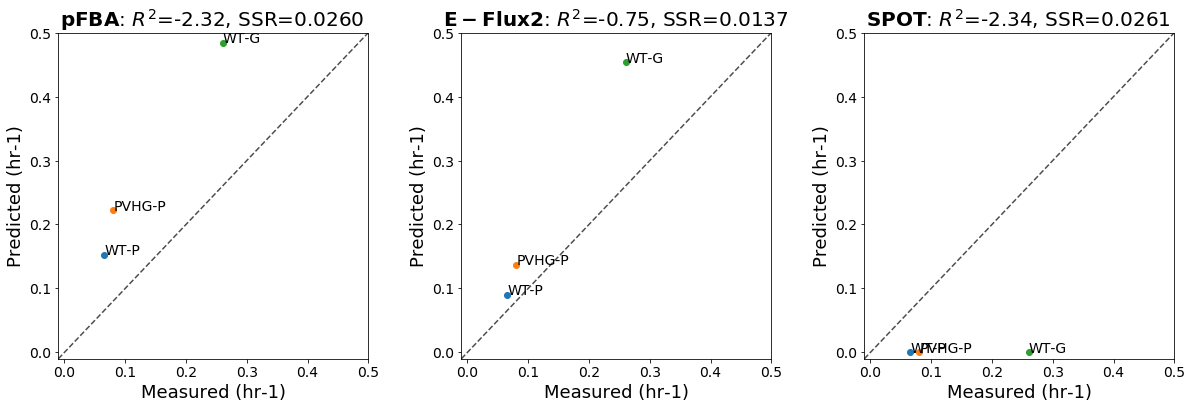

In [36]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

locations = range(3)

methods = ['pFBA', 'E-Flux2', 'SPOT']

# loop over the scatterplots
for location, method, growth_rate_df in zip(locations, methods, growth_rate_dfs):

    # get the names of the conditions
    conditions = list(growth_rate_df.index)

    # get measured and predicted rates from the dataframe
    measured_rates = list(growth_rate_df.loc[conditions, 'growth rate'])
    predicted_rates = list(growth_rate_df.loc[conditions, f'{method} growth rate'])

    # loop over the data points, and add each point to the plot
    for measured_rate, predicted_rate, condition in zip(measured_rates, predicted_rates, conditions):
        axs[location].scatter(measured_rate, predicted_rate)
        axs[location].annotate(condition, (measured_rate, predicted_rate), fontsize=14)

    # calculate r-squared value
    r2 = r2_score(measured_rates, predicted_rates)

    # make a list of absolute errors between measured and predicted rates
    absolute_errors = [
        abs(predicted_rate - measured_rate) 
        for predicted_rate, measured_rate 
        in zip(predicted_rates, measured_rates)
    ]

    # make a list of squared errors between measured and predicted rates
    squared_errors = [
        pow(predicted_rate - measured_rate, 2) 
        for predicted_rate, measured_rate 
        in zip(predicted_rates, measured_rates)
    ]

    # calculate mean absolute error
    mae = round(sum(absolute_errors) / len(measured_rates), 3)

    # calculate sum of squared errors
    ssr = sum(squared_errors) / len(measured_rates)
    print('ssr:', ssr)

    # add 45 degree dashed line
    axis_bounds = [-0.01, 0.5]
    dotted_line = np.linspace(*axis_bounds)
    axs[location].plot(dotted_line, dotted_line, ls="--", c=".3")

    # set title and axes labels
    title = r''+ r"$\bf{" + str(method) + "}$" +': '+ f"$R^2$={r2:.2F}, " + f"SSR={ssr:.4F} "
    axs[location].set_title(title, fontsize=20)
    axs[location].set_ylabel(f'Predicted (hr-1)', fontsize=18)
    axs[location].set_xlabel(f'Measured (hr-1)', fontsize=18)

    # add styles to the plot
    axs[location].tick_params(axis='both', labelsize=14)

    axs[location].set_xlim(axis_bounds)
    axs[location].set_ylim(axis_bounds)


# Adjust the spacing between subplots
fig.subplots_adjust(hspace=0.3, wspace=0.3)
# Show the plot
plt.show()